In [1]:
import matplotlib.pyplot as plt
from generate_passive_simulations import *
from toddler.action_coding import get_mouse_action, mass_answers, force_answers

In [2]:
N_SIMULATIONS_TRAIN = 10
N_SIMULATIONS_VAL = 1
N_SIMULATIONS_TEST = 1

every_world_configuration = generate_every_world_configuration()                              
every_world_answer = np.array(list(map(get_configuration_answer, every_world_configuration)))
n_configurations = len(every_world_configuration)   
                                                                                                 
train_size = 0.7                                                                               
val_size = 0.15                                                                                
test_size = 0.15                                                                               
                                                                                                   
all_indices = np.arange(n_configurations)                                                      
train_indices, not_train_indices = train_test_split(all_indices, train_size=train_size,        
                                                    random_state=0, stratify=every_world_answer)
val_indices, test_indices = train_test_split(not_train_indices, train_size=0.5,                
                                             random_state=0,                                  
                                             stratify=every_world_answer[not_train_indices])   
                                                                                                   
repeated_train_indices = np.random.choice(train_indices, N_SIMULATIONS_TRAIN, replace=True)    
repeated_val_indices = np.random.choice(val_indices, N_SIMULATIONS_VAL, replace=True)          
repeated_test_indices = np.random.choice(test_indices, N_SIMULATIONS_TEST, replace=True)       

train_cond = generate_cond(every_world_configuration[repeated_train_indices])                  
val_cond = generate_cond(every_world_configuration[repeated_val_indices])                      
test_cond = generate_cond(every_world_configuration[repeated_test_indices])   

In [3]:
select_action_randomly = lambda: np.random.randint(low=0, high=9)

In [4]:
new_env = physic_env(train_cond, None, None, (3., 2.), T, ig_mode=0, prior=None, reward_stop=None, mass_answers=mass_answers)
                                                                                                   
mass_answer = get_mass_answer(new_env.cond['mass'])                                            
force_answer = get_force_answer(new_env.cond['lf'])                                           
                 
is_done = False
env_count = 0

while True:   
    action_id = select_action_randomly()
    states, reward, is_done = new_env.step_active(action_id, get_mouse_action)                                                          
    if is_done:
        print(reward)
        new_env.reset()
        env_count += 1
        if env_count == N_SIMULATIONS_TRAIN:
            break
                                                                                                   
data = new_env.step_data()
trial_data = pd.DataFrame()                                                                    
                                                                                                   
for object_id in ["o1", "o2", "o3", "o4"]:                                                     
    for attr in ["x", "y", "vx", "vy"]:                                                        
        trial_data[object_id+"."+attr] = data[object_id][attr]
        
trial_data["mouseX"] = data["mouse"]["x"]
trial_data["mouseY"] = data["mouse"]["y"]
trial_data["mouse.vx"] = data["mouse"]["vx"]
trial_data["mouse.vy"] = data["mouse"]["vy"]
trial_data["idControlledObject"] = ["none" if obj == 0 else "object"+str(obj) for obj in data["co"]]

0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0


In [5]:
from isaac.visualization import make_frame_curried
import moviepy.editor as mpy

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
make_frame = make_frame_curried(trial_data)
duration = trial_data.shape[0]/60
clip = mpy.VideoClip(make_frame, duration=duration)
clip.ipython_display(fps=60)

 50%|█████     | 1/2 [00:00<00:00, 129.38it/s]


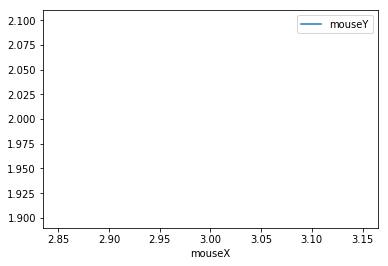

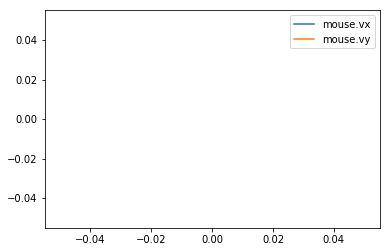

In [7]:
trial_data.plot(x="mouseX", y="mouseY")
trial_data[["mouse.vx", "mouse.vy"]].plot()